### Install MERLIN in C:\Users\BintuLabUser\Scope3AnalysisScripts
### Modify MERLIN to load the zarr files 


### Modify MERLIN to map the zarr files give the current data structure --BB

### Modify MERLIN to do dapi-based (more robust) drift correction (3D) --BB

### Construct the codebook file

Organize the data 

Decode one fov/load in control genes


In [3]:
import numpy as np,os,sys,glob
import matplotlib.pylab as plt
from ioMicro import *

In [102]:
import ioMicro as io
!{io.__file__}

In [10]:
??read_im

In [5]:
import zarr

In [52]:
img = zarr.open(r"Z:\DCBB_1500gnLib_01_23_2023\MERFISH\H1_MERRep_set1\017\data")

In [1]:
import sys
sys.path.append(r'C:\Users\BintuLabUser\Scope3AnalysisScripts\MERlin\MERlin\merlin\util')
#sys.path.append(r'C:\Users\BintuLabUser\Scope3AnalysisScripts\MERlin\MERlin')
from imagereader import *

In [50]:
filename = r"Z:\DCBB_1500gnLib_01_23_2023\MERFISH\H1_MERRep_set2\Conv_zscan__031.zarr"
zobj = ZarrReader(filename)
im_dapi1 = np.array([zobj.load_frame(4+4*ifr) for ifr in range(36)])
filename = r"Z:\DCBB_1500gnLib_01_23_2023\MERFISH\H2_MER_set2\Conv_zscan__031.zarr"
zobj = ZarrReader(filename)
im_dapi2 = np.array([zobj.load_frame(4+4*ifr) for ifr in range(36)])

In [49]:
import numpy as np
drifts = np.load("Z:\MERlin_Analysis\DCBB_1500gnLib_01_23_2023\AlignDAPI3D\drifts\drifts_set2_031.npy")
drifts

array([[  0,   0,   0],
       [  0,  43, -27],
       [  0,  45, -32],
       [  0,  42, -25],
       [  0,  45, -29],
       [  0,  44, -28],
       [  0,  54, -29],
       [  0,  54, -32],
       [  0,   0,   2],
       [ -3,   0,   0],
       [  0,  -1,   2],
       [  2,   0,   5],
       [ -2,  -3,   6],
       [  0,   0,  12],
       [  0,  -1,   8],
       [  0,   0,   0]])

In [52]:
from scipy import ndimage as nd
im_dapi2_shift = nd.shift(im_dapi2,[0, -43, 27],order=0)

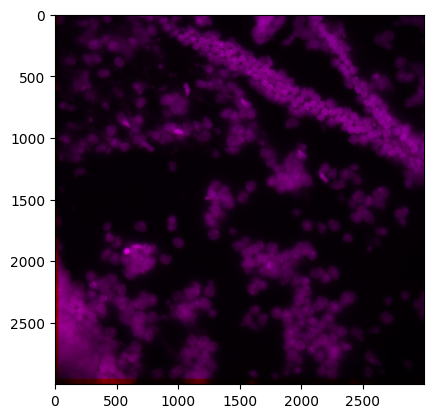

In [57]:
red = im_dapi1[20,:,:]
blue = im_dapi2_shift[20,:,:]
red = red / np.max(red)
blue = blue / np.max(blue)
img = np.array([red, np.zeros_like(red), blue])
img = np.moveaxis(img, 0, -1)
plt.imshow(img)

In [22]:
filename = r"Z:\DCBB_1500gnLib_01_23_2023\MERFISH\H1_MERRep_set1\Conv_zscan__017.zarr"
zobj = ZarrReader(filename)
im_dapi1 = np.array([zobj.load_frame(4+4*ifr) for ifr in range(36)])

In [6]:
filename = r"Z:\DCBB_1500gnLib_01_23_2023\MERFISH\H1_MERRep_set1\Conv_zscan__017.zarr"

In [7]:
zobj = ZarrReader(filename)

In [14]:

plt.imshow(zobj.load_frame(2+4*20))

ModuleNotFoundError: No module named 'napari'

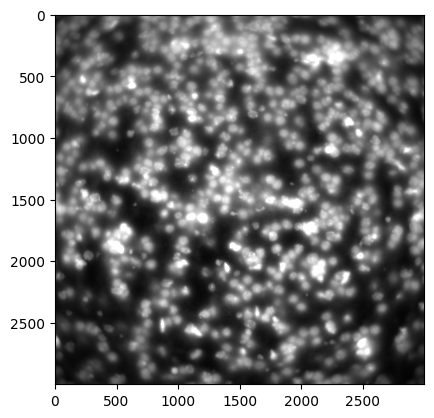

In [75]:
import matplotlib.pyplot as plt
import numpy as np

frame=16
plt.imshow(img[frame], cmap="gray", vmax=np.percentile(img[frame], 99))

In [98]:
import os

def list_files(basePath, depth=0):
    allFiles = [os.path.join(basePath, filename) for filename in os.listdir(basePath)]
    if depth > 0:
        root, dirs, files = next(os.walk(basePath))
        for folder in dirs:
            allFiles.extend(list_files(os.path.join(root, folder), depth-1))
    return allFiles

In [100]:
len(list_files("Z:\DCBB_1500gnLib_01_23_2023", depth=2))

Z:\DCBB_1500gnLib_01_23_2023 2
Z:\DCBB_1500gnLib_01_23_2023\Controls 1
Z:\DCBB_1500gnLib_01_23_2023\Controls\H0_set1 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H0_set2 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H10_MER_set1 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H10_MER_set2 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H11_MER_set1 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H11_MER_set2 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H12_MER_set1 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H12_MER_set2 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H13_MER_set1 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H1_MER_set1 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H1_MER_set2 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H1_PTB_set1 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H1_PTB_set2 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H1_Sox11_Rest_Dcx_set1 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H1_Sox11_Rest_Dcx_set2 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H2_Ptbp2_Neurod2_Mki67_set1 0
Z:\DCBB_1500gnLib_01_23_2023\Controls\H2_Ptbp2_Neurod2_Mki67

116455

In [85]:
import re

regex = r"H(?P<imagingRound>[0-9]+)_MERRep_set1\\(?P<imageType>[\w|-]+)__(?P<fov>[0-9]+)"
#regex = "MERFISH"
m = re.match(regex, 'Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__003.zarr')
m.groupdict()

AttributeError: 'NoneType' object has no attribute 'groupdict'

In [87]:
allFiles

['Z:\\DCBB_1500gnLib_01_23_2023\\Thumbs.db',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H0_set1',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H0_set2',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H10_MER_set1',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H10_MER_set2',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H11_MER_set1',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H11_MER_set2',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H12_MER_set1',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H12_MER_set2',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H13_MER_set1',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H1_MER_set1',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H1_MER_set2',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H1_PTB_set1',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H1_PTB_set2',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H1_Sox11_Rest_Dcx_set1',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H1_Sox11_Rest_Dcx_set2',
 'Z:\\DCBB_1500gnLib_01_23_2023\\Controls\\H2_Ptbp2_Neurod2_Mki67_set1',
 'Z:\\

In [78]:
[x for x in allFiles if x.endswith(".zarr")]

['Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__000.zarr',
 'Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__001.zarr',
 'Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__002.zarr',
 'Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__003.zarr',
 'Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__004.zarr',
 'Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__005.zarr',
 'Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__006.zarr',
 'Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__007.zarr',
 'Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__008.zarr',
 'Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__009.zarr',
 'Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__010.zarr',
 'Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__011.zarr',
 'Z:\\DCBB_1500g

In [33]:
import os
def _list_files(root, depth=2):
    allFiles = [os.path.join(root, filename) for filename in os.listdir(root)]
    if depth > 0:
        _, dirs, _ = next(os.walk(root))
        for folder in dirs:
            allFiles.extend(_list_files(os.path.join(root, folder), depth-1))
    return allFiles

In [44]:
filelist = [x for x in _list_files(r"Z:\DCBB_1500gnLib_01_23_2023") if 'zar' in x and 'MERFISH' in x]

In [47]:
import re
regex = r"MERFISH\\H(?P<imagingRound>[0-9]+)_(?P<imageType>[\w|-]+)_(?P<fov1>set[0-9]+)\\Conv_zscan__(?P<fov2>[0-9]+)"
re.search(regex, filelist[0]).groupdict()

{'imagingRound': '10', 'imageType': 'MERRep', 'fov1': 'set1', 'fov2': '000'}

In [45]:
filelist[0]

'Z:\\DCBB_1500gnLib_01_23_2023\\MERFISH\\H10_MERRep_set1\\Conv_zscan__000.zarr'